<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Мария, доброго дня! рад приветствовать тебя вновь! <br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы. Да и вообще - всячески доставать меня:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>
    
    
<font color='black'>
Николай, привет! На "ты" просто отлично =) 
Я подправила некоторые твои замечания, но у меня возник вопрос, задала его в конце проекта =) Заранее спасибо за ответ! 

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Инструкция по выполнению проекта

#### 1. Загрузите и подготовьте данные.
#### 2. Обучите разные модели с различными гиперпараметрами.
#### 3. Проанализируйте скорость работы и качество моделей.

##### Примечания:
- Для оценки качества моделей применяйте метрику RMSE.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del:

Скопировать код:
del features_train

# 1. Подготовка данных

#### Ознакомимся с данными:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import catboost as cb
import xgboost as xgb
import lightgbm as lgb
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator
from sklearn.linear_model import Lasso, Ridge
from matplotlib import pyplot as plt
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest


rnd_state = 12345
data  = pd.read_csv('/datasets/autos.csv')

In [2]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
data.shape

(354369, 16)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
данные на базе)

#### Подготовим данные для дальнейшего анализа: 

- Проверка числовых признаков на наличие аномалий
- Проверка данных на наличие дубликатов и пропусков
- Удаление дубликатов и обработка пропусков
- Удаление ненужных данных для дальнейшего анализа

##### Проверка числовых признаков на наличие аномалий

In [5]:
columns_numeric = ['Price', 'RegistrationYear', 'Power', 'Kilometer']

def numeric(data, columns_numeric):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for column, ax in zip(columns_numeric, axes.ravel()):
        ax.set_title(column)
        sns.distplot(data[column], ax=ax)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    for column, ax in zip(columns_numeric, axes.ravel()):
        ax.set_title(column)
        sns.boxplot(data[column], ax=ax)

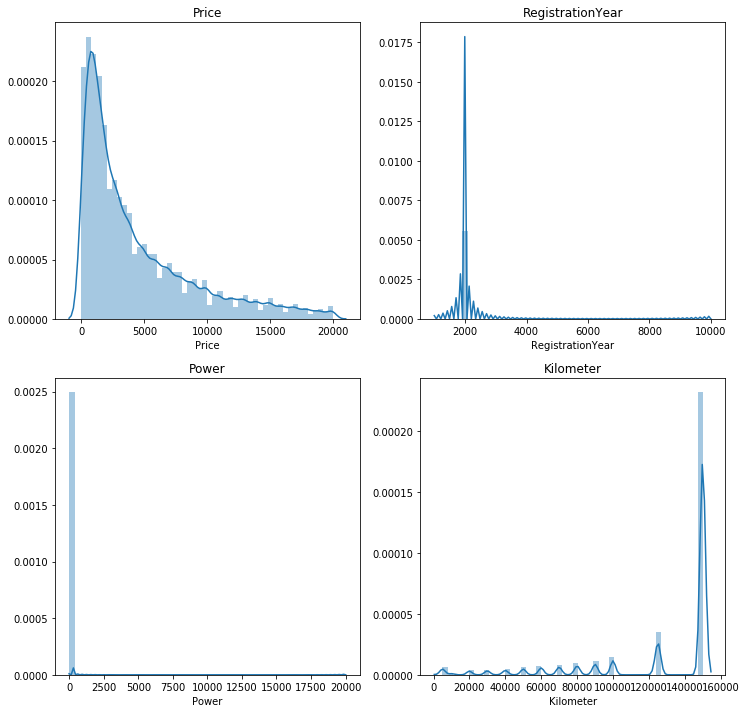

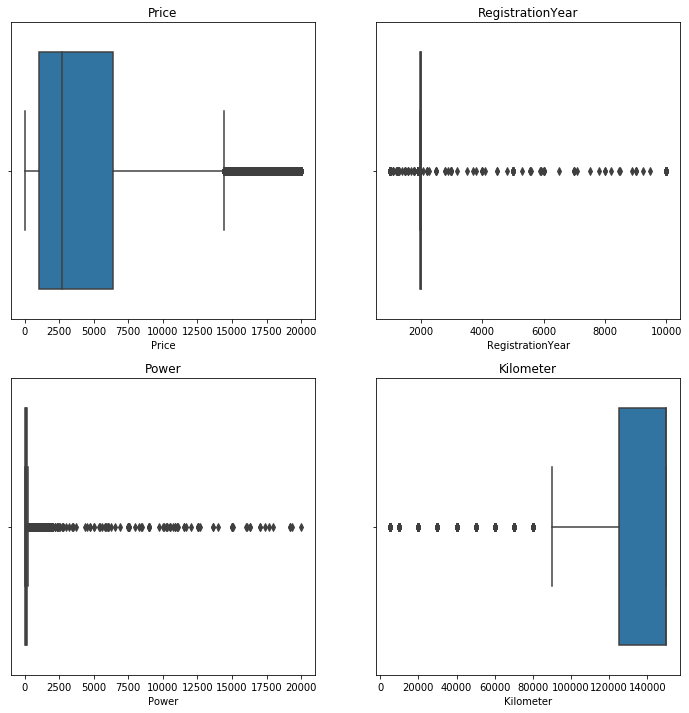

In [6]:
numeric(data, columns_numeric)

- Нули в стоимости - это мы отделим от датасета и будем использовать как тестовые данные
- Не корректное указание года выпуска модели - исправим медианным по модели
- Не корректное указание мощности, есть огромные выбросы - заменим медианным

In [7]:
#Price
# Странно вылядит стоимоть машины, которая менее предположим 200 евро
# занулим ее и будем использовать часть датасета с нулевыми значениями как тестовый
data.loc[data['Price']<=200, 'Price'] = 0

In [8]:
#RegistrationYear
print("Процент данных с ошибками по годам: {:.2%}".format(data
                                                          .query('RegistrationYear<1950 or RegistrationYear>2019')
                                                          .shape[0] / data.shape[0]))

Процент данных с ошибками по годам: 0.10%


In [9]:
#Удалим аномальные значение в столбце RegistrationYear
data = data.loc[(data['RegistrationYear']>1950) & (data['RegistrationYear']<2020)]

In [10]:
#количество автомобилей с нулевой мощностью: 
data[data['Power']==0].shape[0]

39960

In [11]:
#Удалим аномальные значение в столбце RegistrationYear
data = data.loc[(data['Power']>69) & (data['Power']<20000)]

In [12]:
data.shape

(262285, 16)

##### Посмотрим data на наличие пропусков: 

In [13]:
data.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          17972
RegistrationYear         0
Gearbox               4492
Power                    0
Model                10688
Kilometer                0
RegistrationMonth        0
FuelType             16550
Brand                    0
NotRepaired          39213
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

##### Заполним пропуски в категориальных признаках: 

In [14]:
columns_isnull = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

In [15]:
data[columns_isnull] = data[columns_isnull].fillna('Nan')

In [16]:
data.isnull().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

##### Посмотрим data на наличие дубликатов: 

In [17]:
data.duplicated().sum()

4

In [18]:
data = data.drop_duplicates().reset_index(drop=True)

In [19]:
data.duplicated().sum()

0

##### Удалим ненужные для дальнейшего анализа столбцы:

In [20]:
columns_drop = ['DateCrawled', 'LastSeen', 'DateCreated', 'NumberOfPictures']
data = data.drop(columns=columns_drop)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
отлично. Ещё почтовый индекс сюда же можно. В данном виде - он не несёт бизнес-инфо для модели.

#### Выводы:

- Представленные данные состоят из 16 признаков и 354369 объектов. Целевым признаком, в данном случае, является Price — цена (евро)
- Провели анализ аномалии количественных признаков в столбцах: Price, RegistrationYear и Power. В столбце Kilometer каких-то аномальных признаков я не заметила. 
- Удалили ненужные столбцы для дальнейшего анализа
- Зафиксировали псевдослучайность для всех используемых в проекте алгоритмов
- Проверили данные на наличие дубликатов и пропусков
- Удалили дубликаты и обработали пропуска
- Удалили ненужные данные для дальнейшего анализа

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Различают как минимум, 2 типа данных: категориальные и количественные. И есть, как минимум, 2 направления работы с данными: пропуски и аномалии.<br>
Сейчас тебе удалось поработать с пропусками и категориальными переменными.<br><font color='orange'>
Но есть ещё аномалии в количественных данных. С ними тоже надо поработать)

# 2. Обучение моделей


### Действовать будем по следующему плану:

- Напишем функцию которой на вход будут подаваться модель и датасеты и она будет возвращать время обучения, время предсказания
- Проверим 3 модели: Линейная регрессия, CatBoost, LightGBM.
- Для каждой моделии найдем лучшие гиперпараметры, и измерим время обучения на train

Теперь разделим на обычные признаки и целевые. Применим для категориальных признаков метод OHE:

In [21]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Price']
features = data_ohe.drop('Price', axis=1)

In [22]:
data_train, data_valid = train_test_split(data_ohe, test_size=0.2, random_state=rnd_state)
data_valid, data_test = train_test_split(data_valid , test_size=0.2, random_state=rnd_state)

In [23]:
features_train = data_train.drop(columns=['Price'])
target_train = data_train['Price']

features_valid = data_valid.drop(columns=['Price'])
target_valid = data_valid['Price']

features_test = data_test.drop(columns=['Price'])
target_test = data_test['Price']

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
понятно)

Напишем функцию, которая на вход будет подавать модель и датасеты, будет возвращать время обучения, время предсказания и rmse

In [24]:
def model_eval(model, features_train, target_train, features_test, target_test):
    
    start = time.time()    
    model.fit(features_train, target_train)
    training_time = time.time() - start
    
    start = time.time()  
    target_pred = model.predict(features_test)
    predict_time = time.time() - start

    return training_time, predict_time

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
хорошее предложение)

In [25]:
model = LinearRegression()

start_time = time.time()
model.fit(features_train, target_train)

training_time_lr = model_eval(model, features_train, target_train, features_test, target_test)

predict_lr = pd.DataFrame(model.predict(features_valid))
score_lr = mean_squared_error(target_valid, predict_lr) ** 0.5

print("RMSE LinearRegression:", score_lr)
print("Время обучения LinearRegression:", training_time_lr)

RMSE LinearRegression: 2923.8460860212117
Время обучения LinearRegression: (22.20138692855835, 0.11369538307189941)


In [27]:
from collections import defaultdict
d = defaultdict(list)

lgbm_model = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=20, random_state=rnd_state)
start_time = time.time()
lgbm_model.fit(features_train, target_train)

training_time_lgbm = model_eval(model, features_train, target_train, features_test, target_test)

predict_lgbm = pd.DataFrame(lgbm_model.predict(features_valid))
score_lgbm = mean_squared_error(target_valid, predict_lgbm) ** 0.5

print("RMSE LGBMRegressor:", score_lgbm)
print("Время обучения LGBMRegressor:", training_time_lgbm)

RMSE LGBMRegressor: 2876.5248496701274
Время обучения LGBMRegressor: (21.89083480834961, 0.021715402603149414)


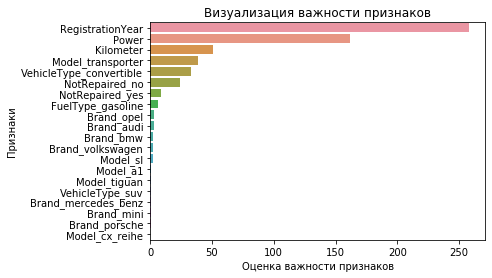

In [29]:
import seaborn as sns
def chart_feature_imp(cat_model):
    feature_imp = pd.Series(cat_model.feature_importances_, index=features_valid.columns).sort_values(ascending=False).head(20)
    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(lgbm_model)

In [30]:
cat_model = CatBoostRegressor(loss_function="RMSE", iterations=50, random_state=rnd_state)
start_time = time.time()
cat_model.fit(features_train, target_train, verbose=10)

training_time_cat = model_eval(model, features_train, target_train, features_test, target_test)

predict_cat = cat_model.predict(features_valid)
score_cat = mean_squared_error(target_valid, predict_cat) ** 0.5

print("RMSE CatBoostRegressor:", score_cat)
print("Время обучения CatBoostRegressor:", training_time_cat)

0:	learn: 4652.5121909	total: 155ms	remaining: 7.61s
10:	learn: 3927.7598221	total: 1.84s	remaining: 6.53s
20:	learn: 3418.3828933	total: 3.44s	remaining: 4.75s
30:	learn: 3072.7355502	total: 5.03s	remaining: 3.08s
40:	learn: 2831.8598825	total: 6.53s	remaining: 1.43s
49:	learn: 2684.1343181	total: 8.01s	remaining: 0us
RMSE CatBoostRegressor: 2715.147073964432
Время обучения CatBoostRegressor: (22.474684715270996, 0.02092576026916504)


In [28]:
cat_features = [i for i, (col, ser) in enumerate(data.iteritems()) if ser.dtype == object]


pool = Pool(data=data.iloc[:, :-1].values, label=data.iloc[:, -1].values, cat_features=cat_features)

cat_model=CatBoostRegressor(iterations=50, verbose=True)
cat_model.fit(pool)

shap_values = cat_model.get_feature_importance(data=pool, fstr_type='ShapValues')

print(shap_values)

0:	learn: 25918.4990475	total: 427ms	remaining: 20.9s
1:	learn: 25908.4444164	total: 835ms	remaining: 20s
2:	learn: 25898.7939030	total: 1.32s	remaining: 20.8s
3:	learn: 25890.4079004	total: 1.82s	remaining: 20.9s
4:	learn: 25882.2492024	total: 2.22s	remaining: 20s
5:	learn: 25874.3470298	total: 2.63s	remaining: 19.3s
6:	learn: 25866.9611430	total: 3.12s	remaining: 19.2s
7:	learn: 25859.3988176	total: 3.52s	remaining: 18.5s
8:	learn: 25852.9112210	total: 3.92s	remaining: 17.9s
9:	learn: 25846.7544496	total: 4.32s	remaining: 17.3s
10:	learn: 25840.6665798	total: 4.72s	remaining: 16.7s
11:	learn: 25835.3001540	total: 5.12s	remaining: 16.2s
12:	learn: 25829.7575136	total: 5.52s	remaining: 15.7s
13:	learn: 25824.4789180	total: 5.92s	remaining: 15.2s
14:	learn: 25819.5782099	total: 6.32s	remaining: 14.8s
15:	learn: 25814.3377254	total: 6.81s	remaining: 14.5s
16:	learn: 25808.6155918	total: 7.21s	remaining: 14s
17:	learn: 25802.6532298	total: 7.61s	remaining: 13.5s
18:	learn: 25796.7386177	t

In [36]:
cat_model.feature_importances_.shape

(11,)

In [43]:
features_valid.columns.shape

(309,)

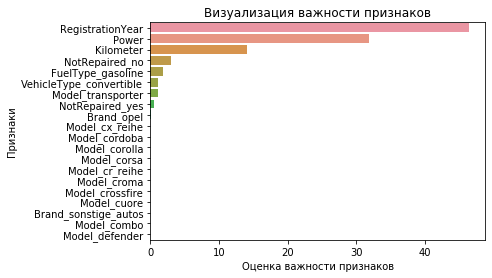

In [32]:
import seaborn as sns
def chart_feature_imp(cat_model):
    feature_imp = pd.Series(cat_model.feature_importances_, index=features_valid.columns).sort_values(ascending=False).head(20)
    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(cat_model)

### Вывод:
- Применили для категориальных признаков метод OHE
- Рассмотрели три алгоритма классификации: CatBoostRegressor, LGBMRegressor, Линейная регрессия
- Модель "CatBoostRegressor" наиболее подходящая для решения дальнейшей задачи

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
хороший раздел)

# 3. Анализ моделей

In [ ]:
data_time = pd.Series({'LinearRegression': training_time_lr,
                           'LightGBM': training_time_lgbm,
                           'CatBoost': training_time_cat}) 

data_time

In [ ]:
data_score = pd.Series({'LinearRegression': score_lr,
                           'LightGBM': score_lgbm,
                           'CatBoost': score_cat}) 

data_score

Проверим выбранную нами модель "CatBoostRegressor" на тестовой выборке:

In [ ]:
features_test = data_ohe.drop('Price', axis=1)
target_test = data_ohe['Price']

cat_model = CatBoostRegressor(loss_function="RMSE", iterations=50, random_state=rnd_state)
start_time = time.time()
cat_model.fit(features_train, target_train, verbose=10)
training_time_cat = model_eval(model, features_train, target_train, features_test, target_test)

predict_cat = cat_model.predict(features_test)
score_cat = mean_squared_error(target_test, predict_cat) ** 0.5

print("RMSE CatBoostRegressor:", score_cat)
print("Время обучения CatBoostRegressor:", training_time_cat)

Наиболее подходящей является модель CatBoostRegressor, она показала лучшие результаты по этим параметрам: 

- качество предсказания;
- скорость предсказания;
- время обучения.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Мария, хорошая модельная работа<br>

Было интерено двигаться от блока к блоку, читать размышления, код и выводы.<br>
При этом оформление выводов такое же последовательное и адекватное.<br>
В целом, ты не забыла поисследовать данные (не до конца правда), и достаточно разносторонне поработать с моделями. Наградой стола - приемлемая метрика (лучшим вариантом тут может быть около 1500)<br>
    
<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то выделил бы такие моменты:<br>
(возможно уже в спринте 6 писал. Но раз не использовано - повторюсь)
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это важный элемент анализа результатов моделирования.<br>  
    
2) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
(ЭТО ПОЗВОЛИТ НЕ ПРОПУСКАТЬ ВАЖНУЮ ЧАСТЬ АНАЛИТИКИ)<BR><BR>
 
Например, алгоритм такой может:<br>
1) анализ аномалий: количественные и категориальные переменные <br>
2) анализ пропусков: количественные и категориальные переменные<br>
3) проверка дубликатов<br>
4) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>
1) Добавь, пожалуйста, анализ количественных данных. (возможно и метрика улучшится).<br>
2) И если будет время, то очень здорово будет, если найдёшь возможность сделать график важности факторов. Это необходимая вещь для финалной части любой модельной работы.<br>
<font color='green'>    
    
<br><br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!
    

<font color='black'>  
Николай привет! Спасибо за твои комментарии и рекомендации. 
Я добавила анализ количественных данных, у меня возник вопрос по поводу графика важности факторов. Ты его рекомендуешь делать после обучения каждой модели? Или делаеть его до обучения моделей, в прицнипе. Я не совсем поняла, что ты тут имеешь ввиду? 
    
Заранее спасибо =) 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>
<br/>
ОК, Мария, спасибо за отклик на комментарии.<br>
Хорошо тебе удалось ещё поработать)<br>
По вопросу о важности факторов:<br>
Так-то, если разобраться, то их нет смысла смотреть до того момента, как будет отобрана лучшая модель<br>
C  другой стороны, бывает так, что разные модели дают разную комбинацию рейтинга фаткоров. Это следствия особенности расчёта самой важности.<br>
Поэтому, можно так: опираться на рейтинг конечной модели. Но если промежуточные модели давали очерёдность факторов сильно отличающуюся от модели-победителя - например мощность на первом месте ку одной, на последнем - у другой (это крайне редко в реальности), то с победителем надо будет ещё раз подумать) Т.е. посмотерть всё ли в порядке с самими моделями. Потому что, должна быть примерная схожесть рейтингов.<br><font color='red'>
Мне удалось ответить?)<br>
 
<font color='black'>
Николай, еще раз привет! Не сталкивалась с методом feature_importances ранее, но попыталась сделать из того, что нашла в интернете =) Я в нужном направлении двигаюсь? =) 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 3</b></u></font><br />
<font color='green'>
<br/>
Здравствуй, Мария!<br>
Вот можно вот такой функцией воспользоватся. Она сразу построит график. (подкорректировать по свои выборки надо, правда.)
Посмотри, пожалуйста.

    
<font color='black'>
    
Николай, привет! Прошу прощение за долгий ответ, у меня вышел компьютер из строя.
    Я посмотрела функцию, но я не понимаю почему разной длины получаются cat_model и features_valid.columns? Теоретически понимаю, а практически не совсем понимаю как исправить эту ситуацию. 

    Заранее спасибо за ответ! =) 
    

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 4</b></u></font><br />
<font color='green'>
<br/>
Здравствуй, Мария!<br>
С компьютером - всегда не приятная вещь. Хорошо, что смогли восстановить<br>
Заново прогнал весь код - заработало, вроде) Добавил только вывод 20 самых лучших.<br>
что-то в памяти, наверное, было у юпитреа)))<br>
    
Всё вывело, как надо.<br>
Тогда, получается, вопросов больше, пока, нет)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ НА НОВОМ (НАДЕЮСЬ) КОМПЕ.
                               

In [ ]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_valid.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(model)

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей